# **Self-Attention Mechanism using Numpy**   
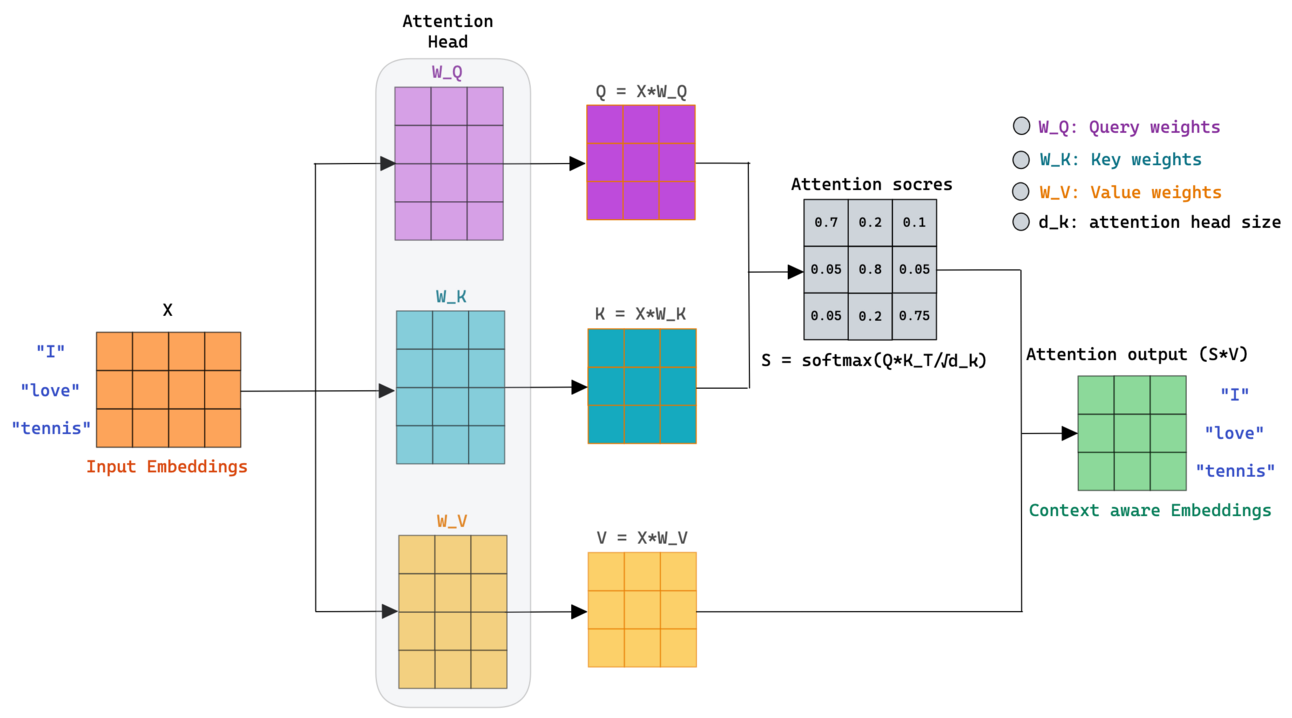
#### ***(Practice or Demonstration purpose only. Which means, this scratch implementaion will only for understand the main concept behind SAM (self-attention machanism))***
🎯 The GOAL of this scratch implementation: 
- Understand and gain hands-on experience.
- Write code to understand the working of Self-Attention Mechanism (SAM):
- Sentence as a input.
- Turns each word into a vector/token.
- Computes how much attention each word gives to every other word (contextual weight).
- Outputs these attention scores so we can visualize the importance of words to each other (optional).

# 🔸 STEP 1: Define a sentence

In [13]:
import numpy as np 
# sentence 
sentence = "The cat sat on the mat"  
 
# split the sentence into tokens
tokens = sentence.split()     
 
# tokens
print(tokens)

['The', 'cat', 'sat', 'on', 'the', 'mat']


#  🔸 STEP 2: Set dimensions  

In [ ]:
# embedding dimention and sequence length 
embedding_dim = 8  
sequence_length = len(tokens)  

#  🔸 STEP 3: Create embeddings for each word  

In [ ]:
X = np.random.rand(1, sequence_length, embedding_dim) 
print(X.shape)

(1, 6, 8)


#  🔸 STEP 4: Create weight matrices  

In [ ]:
d_k = embedding_dim
w_q = np.random.rand(embedding_dim, d_k)
w_k = np.random.rand(embedding_dim, d_k) 
w_v = np.random.rand(embedding_dim, d_k) 
 
# shape of weight matrices
print(w_q.shape, w_k.shape, w_v.shape)

(8, 8) (8, 8) (8, 8)


# 🔸 STEP 5: Compute Q, K, V 


In [ ]:
Q = np.dot(X, w_q)  
K = np.dot(X, w_k) 
V = np.dot(X, w_v) 
 
print(Q.shape, K.shape, V.shape)

(1, 6, 8) (1, 6, 8) (1, 6, 8)


# 🔸 STEP 6: Calculate raw attention scores  

In [85]:
scores = np.dot(Q, np.transpose(K, (0, 2, 1)))  # Query with key
 
# shape of scores  
print(scores.shape)

(1, 6, 1, 6)


# 🔸 STEP 7: Scale the scores 

In [ ]:
scaled_scores = scores / np.sqrt(d_k) 
print(scaled_scores.shape)

(1, 6, 1, 6)


# 🔸 STEP 8: Apply softmax  

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)


In [39]:
attention_weights = softmax(scaled_scores)
print(attention_weights.shape)

(1, 6, 1, 6)


# 🔸 STEP 9: Multiply attention with V 

In [84]:
output = np.dot(attention_weights, V)
print(output.shape) 

(1, 6, 1, 8)


# 🔸 STEP 10: Token 1 : "The" context with other tokens


In [ ]:
# attention_weights[0][0]  is "The" (the first row of the attention weights matrix)    
 
# lets understand practically
print("Row 1 weights: first token is 'The' : ---> ", *[attention_weights[0][0]])  
   
# lets check the output of the first word "The" with highest attention weight 
print("The Highest probablity: ---> ", attention_weights[0][0].max()) 



Row 1 weights: first token is 'The' : --->  [0.0129619  0.0088241  0.00291238 0.89626405 0.07590556 0.00313201]
The Highest probablity: --->  0.896264053717683


### **Conclusion** 
*1. Take the first row:*
- [0.0129, 0.0088, 0.0029, **0.8962**, 0.0759, 0.0031]   
 
*2. Token 1 (e.g., “The”) is attending:*
- ~89.6% attention to token 4 "On"  (highest probability of first row)

*3. Context:*
- context of token 1 "The" with *(token 4 which is "on")*
- contextual Output is: "The on"  
___
 
⚠️ Why this happens: **"The on"**  no context right? 

I used random embeddings and random projection matrices (Wq, Wk, Wv).
So these high scores are not meaningful yet, they just tell us:

- How self-attention Mechanism works ✅
- Shape works ✅
- Scores normalize correctly ✅

